# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [4]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleac

In [5]:
import tensorflow as tf
import os
#example use = os.path.join('data', 'vegetation_sample')

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [9]:
data_dir = 'data' 

In [10]:
#show all images in happy = os.listdir(os.path.join(data_dir, 'vegetation_sample'))

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\no_vegetation_sample\no_vegetation_sample
Issue with image data\vegetation_sample\.ipynb_checkpoints


In [13]:
#cv2.imread(os.path.join('data','no_vegetation_sample', '1003.jpg'))

In [14]:
img.shape

(311, 415, 3)

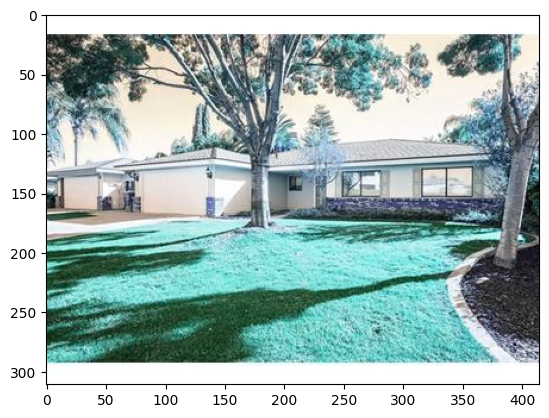

In [15]:
plt.imshow(img)

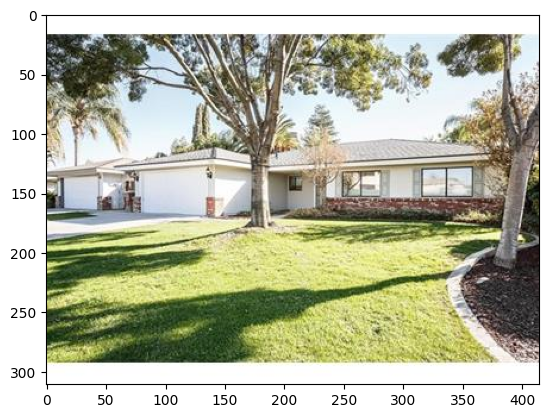

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 3. Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 781 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

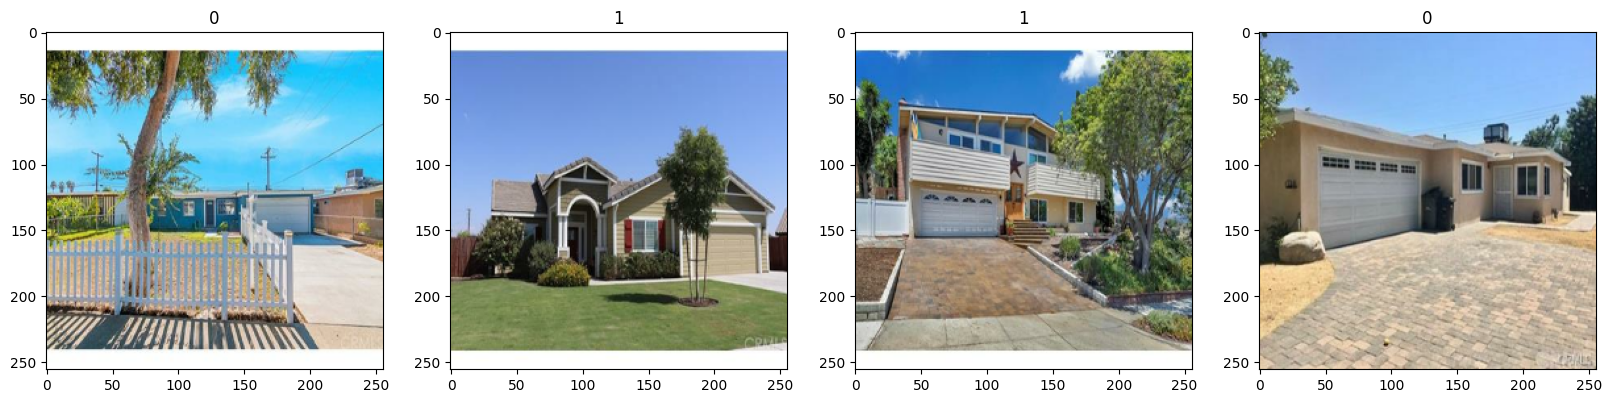

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#0 no veg 1 yes veg

# 4. Scale Data

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.21282016, 0.20105544, 0.17360446],
          [0.19953094, 0.18776624, 0.16031526],
          [0.17354473, 0.15637255, 0.13162531]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.20827971, 0.19651501, 0.17159161],
          [0.21199876, 0.20023406, 0.17531066],
          [0.19162837, 0.17619883, 0.15310784]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.21631436, 0.20338541, 0.18610604],
          [0.22974415, 0.21601713, 0.20033392],
          [0.22456954, 0.21135263, 0.19464919]],
 
         ...,
 
         [[0.5524126 , 0.5680989 , 0.56417733],
          [0.58177

# 5. Split Data

In [39]:
len(data)

25

In [42]:
#70% testing 20% validation 10% testing
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [43]:
train_size+val_size+test_size

25

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [45]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [1]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#activation = 'softmax' for dense layers greater than 1

NameError: name 'model' is not defined

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 [==============================] - 16s 762ms/step - loss: 0.8314 - accuracy: 0.5538 - val_loss: 0.6810 - val_accuracy: 0.6812
Epoch 2/20
18/18 [==============================] - 14s 742ms/step - loss: 0.6669 - accuracy: 0.6128 - val_loss: 0.6409 - val_accuracy: 0.6938
Epoch 3/20
18/18 [==============================] - 14s 736ms/step - loss: 0.6319 - accuracy: 0.6649 - val_loss: 0.5930 - val_accuracy: 0.7437
Epoch 4/20
18/18 [==============================] - 14s 760ms/step - loss: 0.6256 - accuracy: 0.6684 - val_loss: 0.6210 - val_accuracy: 0.7000
Epoch 5/20
18/18 [==============================] - 14s 771ms/step - loss: 0.5833 - accuracy: 0.7066 - val_loss: 0.5361 - val_accuracy: 0.7688
Epoch 6/20
18/18 [==============================] - 15s 788ms/step - loss: 0.5676 - accuracy: 0.7170 - val_loss: 0.5466 - val_accuracy: 0.7375
Epoch 7/20
18/18 [==============================] - 14s 757ms/step - loss: 0.4964 - accuracy: 0.7760 - val_loss: 0.4930 - val_accuracy: 0.7688

# 8. Plot Performance

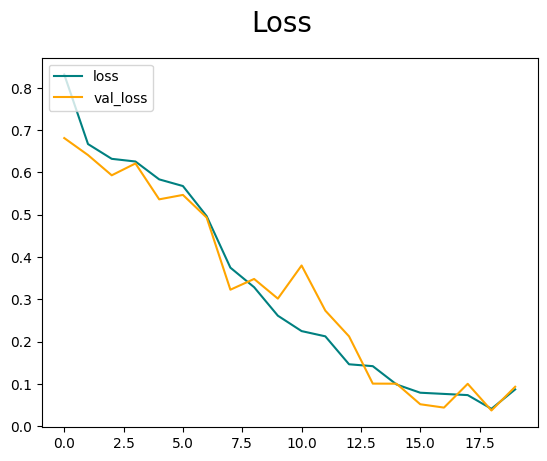

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

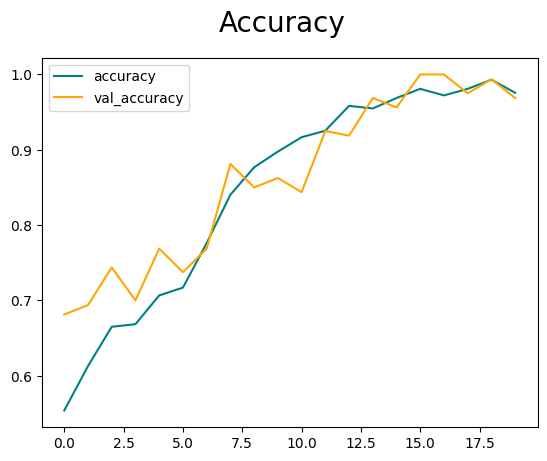

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 197ms/step


In [59]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.92, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9512195, shape=(), dtype=float32)


In [60]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9200000166893005, Recall:1.0, Accuracy:0.9512194991111755


# 10. Test

In [23]:
import cv2

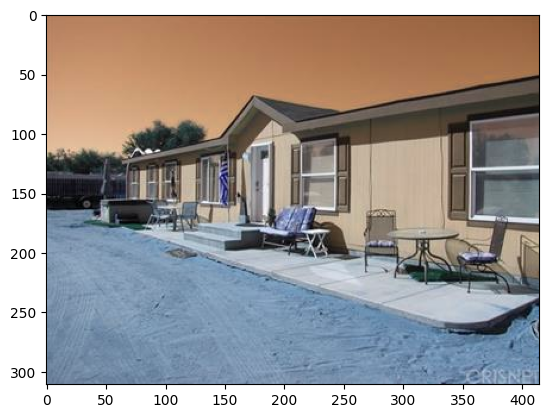

In [25]:
img = cv2.imread('1003.jpg')
plt.imshow(img)
plt.show()

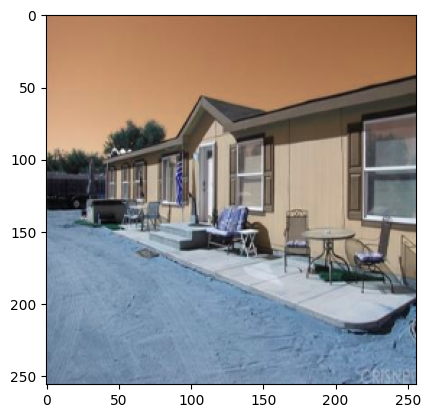

In [26]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 58ms/step


In [67]:
yhat

array([[0.17673443]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is vegetation')
else:
    print(f'Predicted class is non-vegetation')

Predicted class is non-vegetation


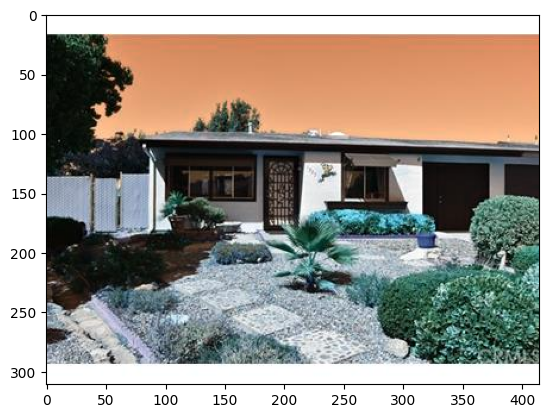

In [70]:
img = cv2.imread('13588.jpg')
plt.imshow(img)
plt.show()

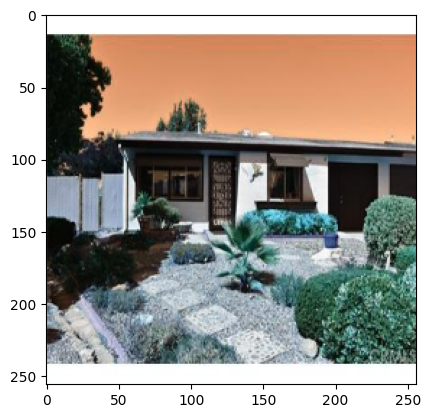

In [71]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [72]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [73]:
yhat

array([[0.9973421]], dtype=float32)

In [74]:
if yhat > 0.5: 
    print(f'Predicted class is vegetation')
else:
    print(f'Predicted class is non-vegetation')

Predicted class is vegetation


# 11. Save the Model

In [3]:
from tensorflow.keras.models import load_model

In [2]:
model.save(os.path.join('models','vegetationclassifier.h5'))

NameError: name 'model' is not defined

In [6]:
new_model = load_model(os.path.join('models', 'vegetationclassifier.h5'))

In [27]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 161ms/step


array([[0.17673443]], dtype=float32)

In [28]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0